In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb # XGBoost Regressor

# Pipeline (Less common for basic regression unless specific transforms needed)

print("Libraries imported for Regression Modeling.")

Libraries imported for Regression Modeling.


In [3]:
# Define paths to the processed data files
processed_data_dir = 'data_processed'
features_path = os.path.join(processed_data_dir, 'train_final_features.csv')
reg_target_path = os.path.join(processed_data_dir, 'train_final_y_reg.csv') # Path to the regression target

# Load the data
try:
    X = pd.read_csv(features_path)
    # Load the regression target
    y_reg = pd.read_csv(reg_target_path).squeeze() # Squeeze to make it a Series
    print("Processed features and regression target loaded successfully.")
    print(f"Features shape: {X.shape}")
    print(f"Regression Target shape: {y_reg.shape}")
    print("\nRegression Target distribution summary:")
    print(y_reg.describe())
except FileNotFoundError as e:
    print(f"Error loading processed data files: {e}")
    print("Ensure the feature engineering notebook (3_feature_engineering.ipynb) was run successfully and saved all files.")
    raise
except Exception as e:
    print(f"An error occurred: {e}")
    raise

# --- IMPORTANT: Sanitize feature names ---
# Apply the same sanitization as in classification if using XGBoost
import re
def sanitize_feature_names(df):
    original_columns = df.columns.tolist()
    new_columns = []
    for col in original_columns:
        clean_col = re.sub(r'[\[\]<]', '_', str(col))
        new_columns.append(clean_col)
    df.columns = new_columns
    return df

print("\nSanitizing feature names for X...")
X = sanitize_feature_names(X.copy())
print("X columns after sanitization:")
print(X.columns)

Processed features and regression target loaded successfully.
Features shape: (22910, 72)
Regression Target shape: (22910,)

Regression Target distribution summary:
count    22910.000000
mean       253.017765
std        315.969384
min         18.000000
25%         67.000000
50%        152.000000
75%        314.750000
max       7265.000000
Name: session_revenue_potential, dtype: float64

Sanitizing feature names for X...
X columns after sanitization:
Index(['session_length', 'unique_main_categories', 'unique_models_viewed',
       'unique_colours', 'avg_price_viewed', 'max_price_viewed',
       'model_photography__lambda>', 'price_2__lambda>', 'country_first_1',
       'country_first_2', 'country_first_3', 'country_first_4',
       'country_first_5', 'country_first_6', 'country_first_7',
       'country_first_8', 'country_first_9', 'country_first_10',
       'country_first_11', 'country_first_12', 'country_first_13',
       'country_first_14', 'country_first_15', 'country_first_16',
   

In [4]:
# Split data into training (80%) and testing (20%) sets
# random_state ensures reproducibility
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("Data split into training and testing sets for regression.")
print(f"X_train_reg shape: {X_train_reg.shape}, y_train_reg shape: {y_train_reg.shape}")
print(f"X_test_reg shape: {X_test_reg.shape}, y_test_reg shape: {y_test_reg.shape}")

Data split into training and testing sets for regression.
X_train_reg shape: (18328, 72), y_train_reg shape: (18328,)
X_test_reg shape: (4582, 72), y_test_reg shape: (4582,)



--- Training Regression Models ---

Training Linear Regression...
Linear Regression Training Complete.
  Mean Absolute Error (MAE): 30.8324
  Mean Squared Error (MSE): 2536.5379
  Root Mean Squared Error (RMSE): 50.3641
  R-squared (R2 Score): 0.9763


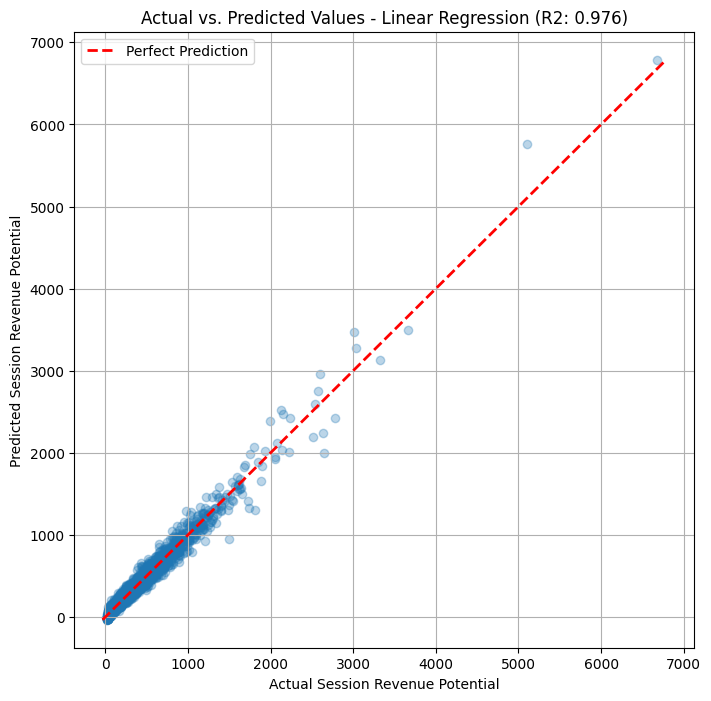


Training Ridge Regression...
Ridge Regression Training Complete.
  Mean Absolute Error (MAE): 29.7823
  Mean Squared Error (MSE): 2524.8781
  Root Mean Squared Error (RMSE): 50.2482
  R-squared (R2 Score): 0.9764


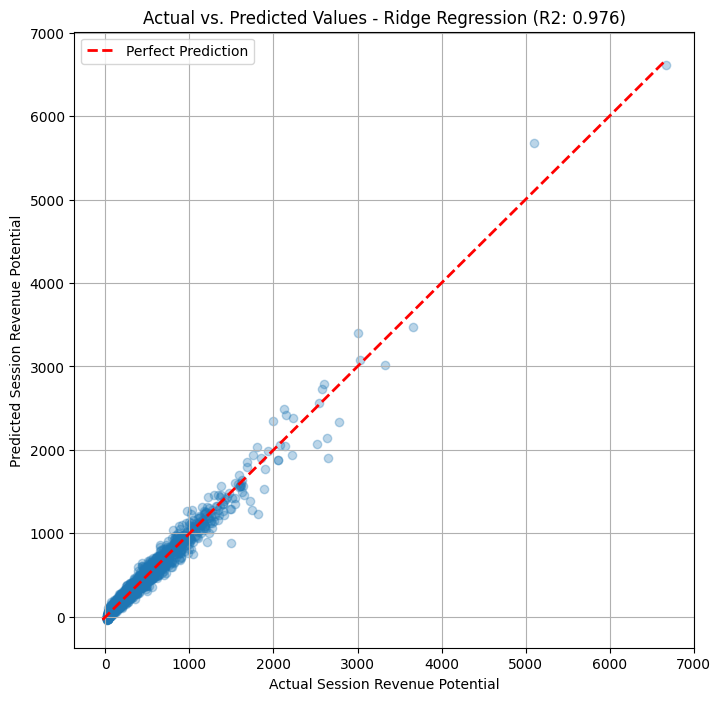


Training Lasso Regression...
Lasso Regression Training Complete.
  Mean Absolute Error (MAE): 35.2488
  Mean Squared Error (MSE): 3652.8108
  Root Mean Squared Error (RMSE): 60.4385
  R-squared (R2 Score): 0.9658


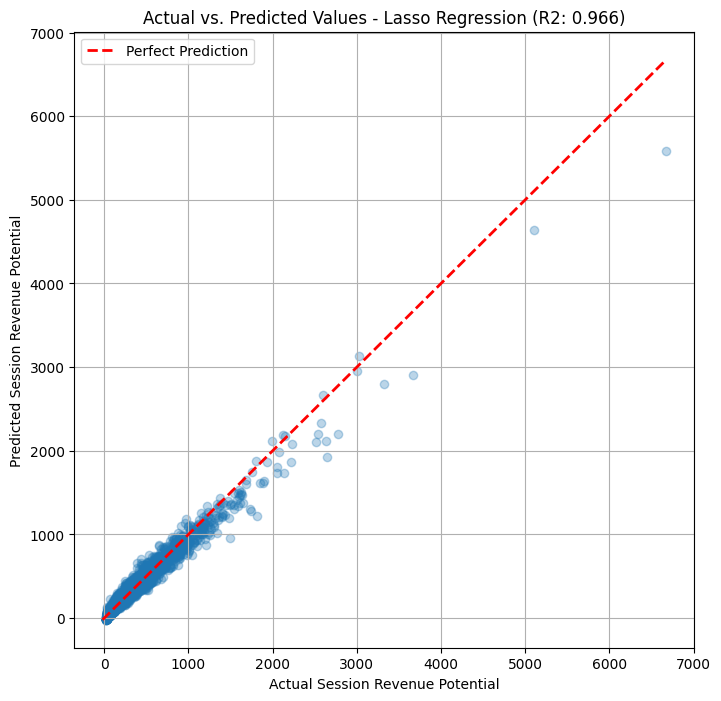


Training Random Forest Regressor...
Random Forest Regressor Training Complete.
  Mean Absolute Error (MAE): 15.5156
  Mean Squared Error (MSE): 1463.1276
  Root Mean Squared Error (RMSE): 38.2509
  R-squared (R2 Score): 0.9863


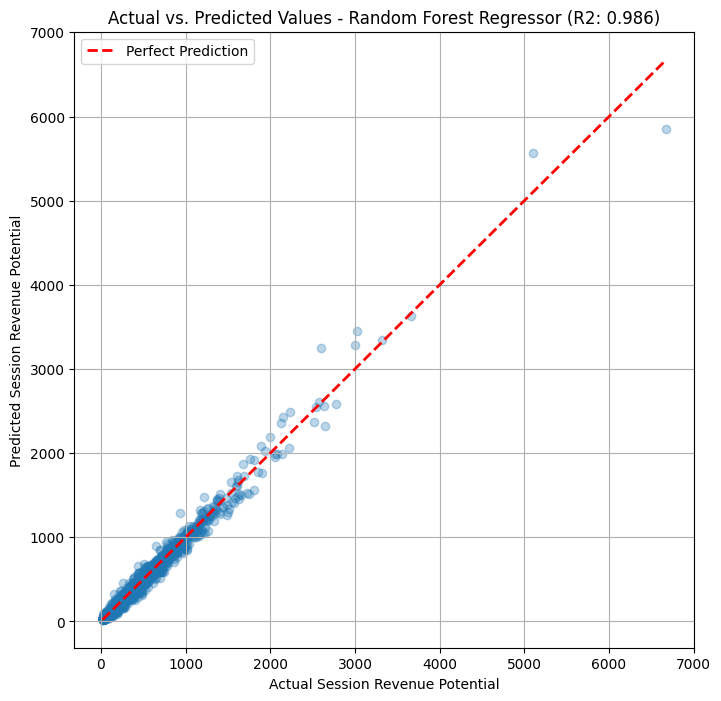


Training XGBoost Regressor...
XGBoost Regressor Training Complete.
  Mean Absolute Error (MAE): 17.2227
  Mean Squared Error (MSE): 1361.0937
  Root Mean Squared Error (RMSE): 36.8930
  R-squared (R2 Score): 0.9873


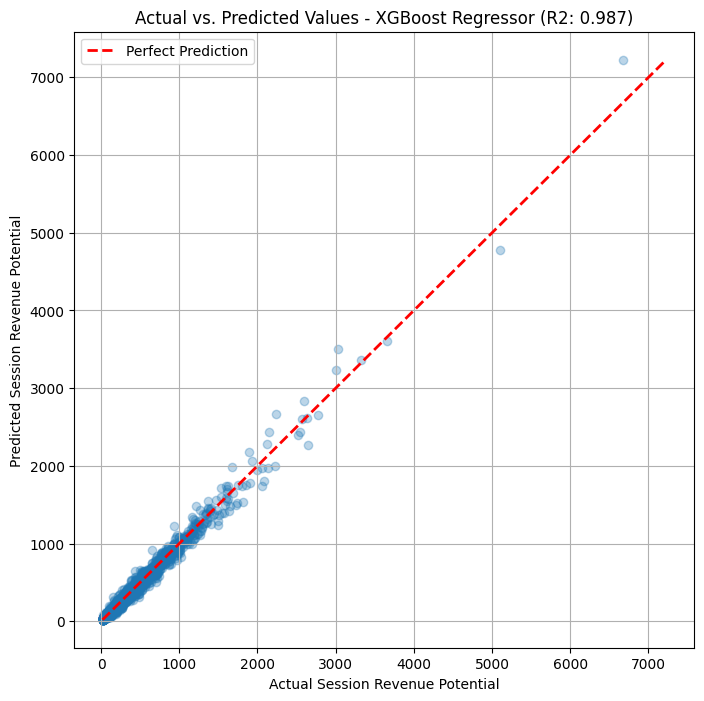


--- Regression Model Comparison ---
                               MAE          MSE       RMSE  R2 Score
XGBoost Regressor        17.222719  1361.093733  36.893004  0.987260
Random Forest Regressor  15.515615  1463.127623  38.250851  0.986305
Ridge Regression         29.782276  2524.878126  50.248165  0.976368
Linear Regression        30.832425  2536.537896  50.364054  0.976259
Lasso Regression         35.248843  3652.810769  60.438487  0.965810


In [5]:
print("\n--- Training Regression Models ---")

# Define models
reg_models = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Ridge Regression": Ridge(random_state=42), # Regularized Linear Regression
    "Lasso Regression": Lasso(random_state=42), # Another regularized LR (can do feature selection)
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost Regressor": xgb.XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror') # Common objective for regression
}

# Dictionary to store trained models and results
trained_reg_models = {}
reg_results = {}

# Train and evaluate each model
for name, model in reg_models.items():
    print(f"\nTraining {name}...")
    # Train on the training data
    model.fit(X_train_reg, y_train_reg)

    # Make predictions on the test set
    y_pred_reg = model.predict(X_test_reg)

    # Evaluate metrics
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred_reg)

    # Store results
    reg_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }
    trained_reg_models[name] = model # Store the trained model instance

    print(f"{name} Training Complete.")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}") # RMSE is in the same units as the target
    print(f"  R-squared (R2 Score): {r2:.4f}") # Proportion of variance explained

    # --- Visualization: Actual vs Predicted ---
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
    # Add line for perfect prediction
    min_val = min(y_test_reg.min(), y_pred_reg.min())
    max_val = max(y_test_reg.max(), y_pred_reg.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')
    plt.xlabel("Actual Session Revenue Potential")
    plt.ylabel("Predicted Session Revenue Potential")
    plt.title(f"Actual vs. Predicted Values - {name} (R2: {r2:.3f})")
    plt.legend()
    plt.grid(True)
    plt.show()


# Convert results to DataFrame for easy comparison
reg_results_df = pd.DataFrame(reg_results).T # Transpose
print("\n--- Regression Model Comparison ---")
# Sort by R2 Score (higher is better) or RMSE (lower is better)
print(reg_results_df.sort_values(by='R2 Score', ascending=False))
# print(reg_results_df.sort_values(by='RMSE', ascending=True))

In [ ]:
# --- Select and Save Best Regression Model ---
# Choose based on R2 Score (higher is better) or RMSE (lower is better)
best_reg_model_name = reg_results_df['R2 Score'].idxmax()
# best_reg_model_name = reg_results_df['RMSE'].idxmin() # Alternative selection criteria
best_reg_model = trained_reg_models[best_reg_model_name]

print(f"\nSelected Best Regression Model: {best_reg_model_name}")

# Define path for saving the model
output_dir = 'models'
os.makedirs(output_dir, exist_ok=True)
reg_model_save_path = os.path.join(output_dir, 'best_regression_model.joblib')

# Save the model
joblib.dump(best_reg_model, reg_model_save_path)
print(f"Best regression model saved to: {reg_model_save_path}")


Selected Best Regression Model: XGBoost Regressor
Best regression model saved to: ../src/models\best_regression_model.joblib
